# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [2]:
import datashader as ds

In [3]:
from sqlalchemy import create_engine

engine = create_engine('postgres://localhost:5432/global_fishing_watch')
engine.table_names()

['vessels', 'fishing_vessels', 'fishing_effort_by_vessel', 'fishing_effort']

In [7]:
df = pd.read_sql("SELECT * FROM fishing_effort LIMIT 100000", 
                 engine, parse_dates=['date'])
df['lon'] = df['lon_bin'] / 100
df['lat'] = df['lat_bin'] / 100


df.head()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present,lon,lat
0,2016-12-20,2779,12126,CHN,fixed_gear,2.463611,2.333472,1,121.26,27.79
1,2016-12-20,3648,12126,CHN,trawlers,3.925278,3.645694,7,121.26,36.48
2,2016-12-20,3937,12126,CHN,fixed_gear,0.351250,0.000000,1,121.26,39.37
3,2016-12-20,3645,12126,CHN,trawlers,2.169444,2.169444,4,121.26,36.45
4,2016-12-20,2791,12126,CHN,purse_seines,0.128889,0.000000,1,121.26,27.91


In [9]:
from datashader.utils import lnglat_to_meters
import datashader.transfer_functions as tf

df['x'], df['y'] = lnglat_to_meters(df['lon'], df['lat'])
df.head()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present,lon,lat,x,y
0,2016-12-20,2779,12126,CHN,fixed_gear,2.463611,2.333472,1,121.26,27.79,1.349860e+07,3.222523e+06
1,2016-12-20,3648,12126,CHN,trawlers,3.925278,3.645694,7,121.26,36.48,1.349860e+07,4.366871e+06
2,2016-12-20,3937,12126,CHN,fixed_gear,0.351250,0.000000,1,121.26,39.37,1.349860e+07,4.774810e+06
3,2016-12-20,3645,12126,CHN,trawlers,2.169444,2.169444,4,121.26,36.45,1.349860e+07,4.362719e+06
4,2016-12-20,2791,12126,CHN,purse_seines,0.128889,0.000000,1,121.26,27.91,1.349860e+07,3.237632e+06


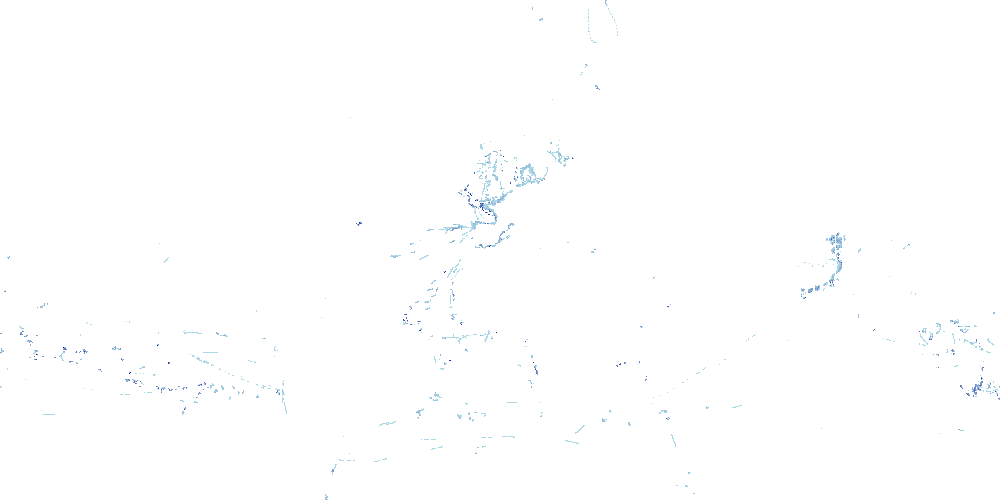

In [10]:
cvs = ds.Canvas(plot_width=1000, plot_height=500)
agg = cvs.points(df, 'x', 'y', ds.mean('fishing_hours'))
img = tf.shade(agg, cmap=['lightblue', 'darkblue'], how='log')
img

In [22]:
agg

<xarray.DataArray (y: 500, x: 1000)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y        (y) float64 -6.959e+06 -6.914e+06 ... 1.533e+07 1.537e+07
  * x        (x) float64 -2.002e+07 -1.998e+07 ... 1.998e+07 2.002e+07

In [11]:
bound = 20026376.39
bounds = dict(x_range = (-bound, bound), y_range = (int(-bound*0.4), int(bound*0.6)))
plot_width = 1000
plot_height = int(plot_width*0.5)

cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, **bounds)

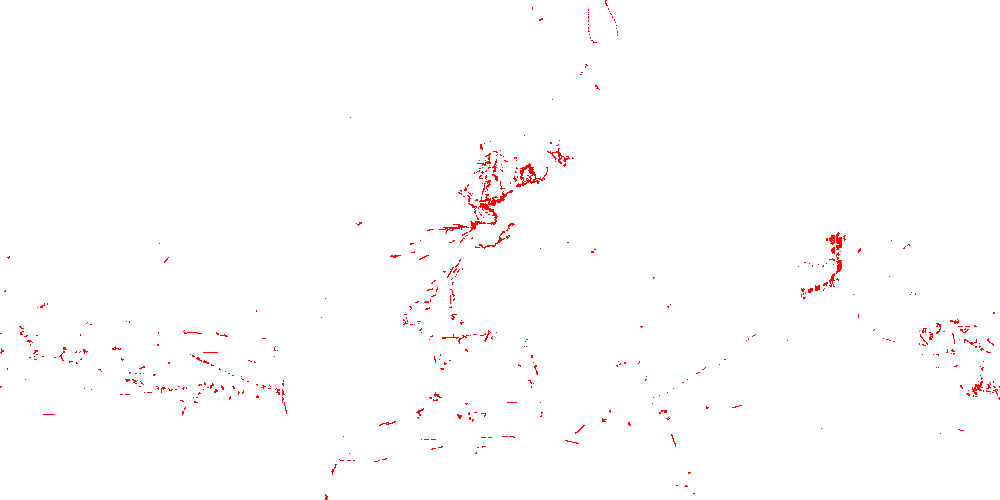

In [13]:
tf.shade(agg, cmap=['red'])

In [6]:
s = 'string'


AttributeError: 'str' object has no attribute 'insert'

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here